# Practical A(2)
Aim:- Demonstrate Data imputation with Statistical technique on numerical values & write down the conclusion about the assumption.

In [54]:
import pandas as pd
import numpy as np

In [55]:
df=pd.read_csv("Data/titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [57]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [58]:
# to check null varlue percentages

df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [59]:
df.shape

(891, 4)

In [61]:
# independent columns

x = df.drop(columns = ['Survived'])

In [62]:
#dependent columns

y = df['Survived']

In [63]:
# import

from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, 
                                                    random_state=2)

In [65]:
x_train.shape

(712, 3)

In [66]:
x_test.shape

(179, 3)

In [67]:
df.describe() # to check mean median of original data

,Age,Fare,Family,Survived
count,714.000000,846.000000,891.000000,891.000000
mean,29.699118,32.279338,0.904602,0.383838
std,14.526497,50.305796,1.613459,0.486592
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.206250,1.000000,1.000000
max,80.000000,512.329200,10.000000,1.000000


In [68]:
# mean & median of age
mean_age=x_train['Age'].mean()
mean_age

29.78590425531915

In [69]:
median_age=x_train['Age'].median()
median_age

28.75

In [70]:
# mean & median of age
mean_fare=x_train['Fare'].mean()
median_fare=x_train['Fare'].median()
mean_fare

32.617596893491076

In [71]:
median_fare

14.4583

# Imputation

In [72]:
# making new columns with filling Nulls with mean and median
x_train['Age_mean']=x_train['Age'].fillna(mean_age)
x_train['Age_median']=x_train['Age'].fillna(mean_age)

In [73]:
# fare mean and median
x_train['Fare_mean']=x_train['Fare'].fillna(mean_fare)
x_train['Fare_median']=x_train['Fare'].fillna(mean_fare)

In [38]:
x_train # check new columns

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
30,40.0,27.7208,0,40.000000,40.000000,27.7208,27.7208
10,4.0,16.7000,2,4.000000,4.000000,16.7000,16.7000
873,47.0,9.0000,0,47.000000,47.000000,9.0000,9.0000
182,9.0,31.3875,6,9.000000,9.000000,31.3875,31.3875
876,20.0,9.8458,0,20.000000,20.000000,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.000000,30.000000,8.6625,8.6625
584,NaN,8.7125,0,29.785904,29.785904,8.7125,8.7125
493,71.0,49.5042,0,71.000000,71.000000,49.5042,49.5042
527,NaN,221.7792,0,29.785904,29.785904,221.7792,221.7792


In [39]:
"""print("Before imputation variance of age",x_train['Age'].var())
print("After imputation variance of mean age",x_train['Age_mean'].var())
print("After imputation variance of median age",x_train['Age_median'].var())"""


Before imputation variance of age 204.3495133904614
After imputation variance of mean age 161.81262452718673
After imputation variance of median age 161.81262452718673


In [41]:
print("Before Imputation Age variance: ", round(x_train['Age'].var() ,2) )

# age mean

print("After Imputation Age variance : ", round(x_train['Age_mean'].var() , 2 ) )

# age median

print("After Imputation Age variance : ", round(x_train['Age_median'].var() , 2 ) )

Before Imputation Age variance:  204.35
After Imputation Age variance :  161.81
After Imputation Age variance :  161.81


In [40]:
"""print("Before imputation variance of Fare",x_train['Fare'].var())
print("After imputation variance of mean Fare",x_train['Fare_mean'].var())
print("After imputation variance of median Fare",x_train['Fare_median'].var())"""


Before imputation variance of Fare 2448.197913706318
After imputation variance of mean Fare 2324.2385256705547
After imputation variance of median Fare 2324.2385256705547


In [42]:
print("Before Imputation Fare variance: ", round(x_train['Fare'].var() ,2) )

# age mean

print("After Imputation Fare variance : ", round(x_train['Fare_mean'].var() , 2 ) )

# age median

print("After Imputation Fare variance : ", round(x_train['Fare_median'].var() , 2 ) )

Before Imputation Fare variance:  2448.2
After Imputation Fare variance :  2324.24
After Imputation Fare variance :  2324.24


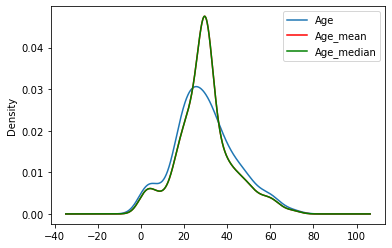

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

fig=plt.figure()
ax=fig.add_subplot(111)
x_train['Age'].plot(kind='kde',ax=ax) #Original Distribution

# After Imputation with Mean
x_train['Age_mean'].plot(kind='kde',ax=ax,color='Red')

# After Imputation with Median
x_train['Age_median'].plot(kind='kde',ax=ax,color='Green')

# Adding legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


In [75]:
"""import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.distplot(x_train['Age'], hist = False, color = "blue")
sns.distplot(x_train['Age_mean'], hist = False, color = "orange")
sns.distplot(x_train['Age_median'], hist = False, color = "green")

plt.legend(labels=['Age', 'Age_mean', 'Age_median'])"""

'import matplotlib.pyplot as plt\nimport seaborn as sns\n\nimport warnings\nwarnings.filterwarnings("ignore")\n\nsns.distplot(x_train[\'Age\'], hist = False, color = "blue")\nsns.distplot(x_train[\'Age_mean\'], hist = False, color = "orange")\nsns.distplot(x_train[\'Age_median\'], hist = False, color = "green")\n\nplt.legend(labels=[\'Age\', \'Age_mean\', \'Age_median\'])'

**we can see that percentage of missing values of age column  is 19% , that's why after Imputation ,we can see in the above diagram that distribution has been completely changed from original position.**

**So we cannot apply numericalImputation over here because it will gives us inaccurate results**

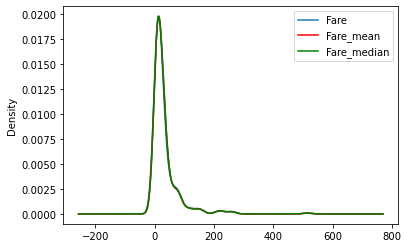

In [76]:
# less than 5% missing value
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
x_train['Fare'].plot(kind='kde',ax=ax) #Original Distribution

# After Imputation with Mean
x_train['Fare_mean'].plot(kind='kde',ax=ax,color='Red')

# After Imputation with Median
x_train['Fare_median'].plot(kind='kde',ax=ax,color='Green')

# Adding legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [77]:
"""import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.distplot(x_train['Fare'], hist = False, color = "blue")
sns.distplot(x_train['Fare_mean'], hist = False, color = "orange")
sns.distplot(x_train['Fare_median'], hist = False, color = "green")

plt.legend(labels=['Fare', 'Fare_mean', 'Fare_median'])"""

'import matplotlib.pyplot as plt\nimport seaborn as sns\n\nimport warnings\nwarnings.filterwarnings("ignore")\n\nsns.distplot(x_train[\'Fare\'], hist = False, color = "blue")\nsns.distplot(x_train[\'Fare_mean\'], hist = False, color = "orange")\nsns.distplot(x_train[\'Fare_median\'], hist = False, color = "green")\n\nplt.legend(labels=[\'Fare\', \'Fare_mean\', \'Fare_median\'])'

**we know that percentage of missing values of Fare column is 5% , that's why after Imputation ,we can see in the above diagram that the new distribution is almost same as the original distribution.**

**So we can apply numericalImputation over here.**


**@To directly fill mean , median values**

In [78]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [79]:
imputer1=SimpleImputer(strategy='mean')
imputer2=SimpleImputer(strategy='median')

In [80]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Age'])
],remainder='passthrough')

In [81]:
trf.fit(df)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Age'])])

In [83]:
# mean value of column
trf.named_transformers_['imputer1'].statistics_

array([29.69911765])

In [84]:
trf.named_transformers_['imputer2'].statistics_

array([28.])

In [ ]:
# Conclusion :- as we have taken two columns age an 

In [ ]:
# Assumption :- if you have more than 5% missing values in your dataset do not replace it with mean and median because it gives you
# very much difference from original distribution.

**Assumption** : As we tried imputaion on above dataset, so now we can say that we can Apply Imputation where missing values of the columns are less than or equal to 5% & If missing values are more that 5% then after Imputation we will get incorrect results.

**Conclusion** :

To handle numerical imputaion we are doing this practice of imputing mean/median value at position of missing values.  
As we have taken two columns Age and Fare for numerical imputaion of our data so, in above data Age column has 19% missing values, after applying Imputation on Age column the distribution of Age values is completely changed. So we cannot apply Imputation on Age column. it will gives us incorrect results. Similarly we had applied Imputation on Fare column where missing values are 5% and after Imputation distribution of fare values is almost same or similar, so we can apply Imputation over there to get more accurate results.